In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import pickle
sys.path.append('..')
from config import experiments_dir

In [7]:
exp_dir = os.path.join(experiments_dir, 'RN10')
print(exp_dir)

with open(os.path.join(exp_dir, 'test_set'), 'rb') as f:
    test_set = pickle.load(f)
    
with open(os.path.join(exp_dir, 'soft_preds.npy'), 'rb') as f:
    soft_preds =  np.load(f)
    
print(test_set.__len__())
print(len(soft_preds))

/mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/experiments/RN10
118
118


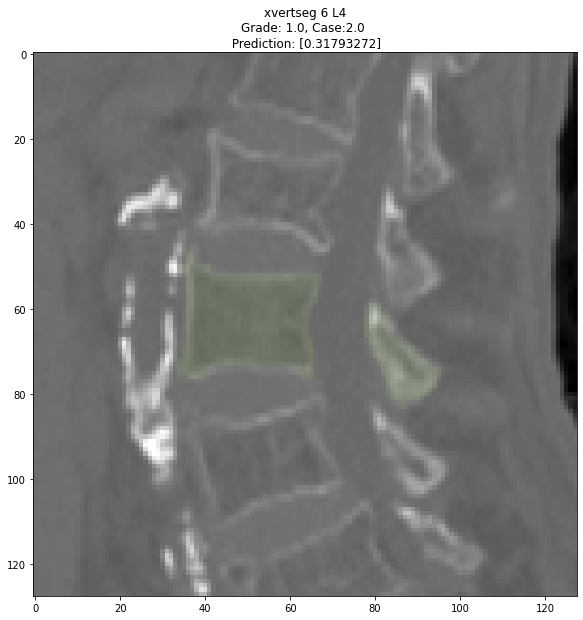

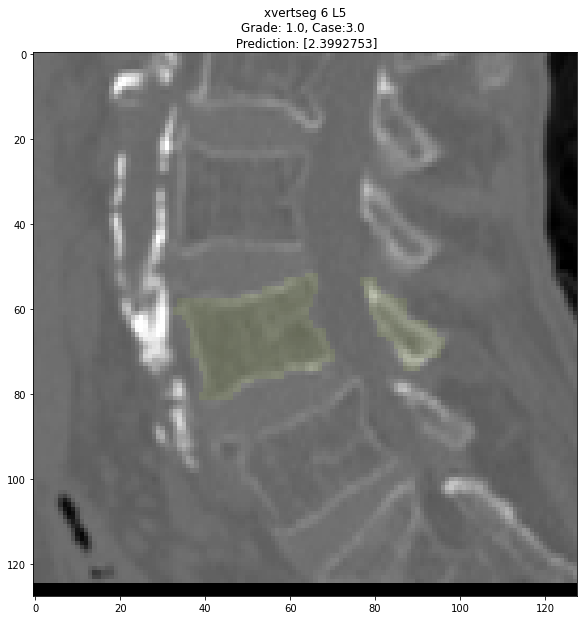

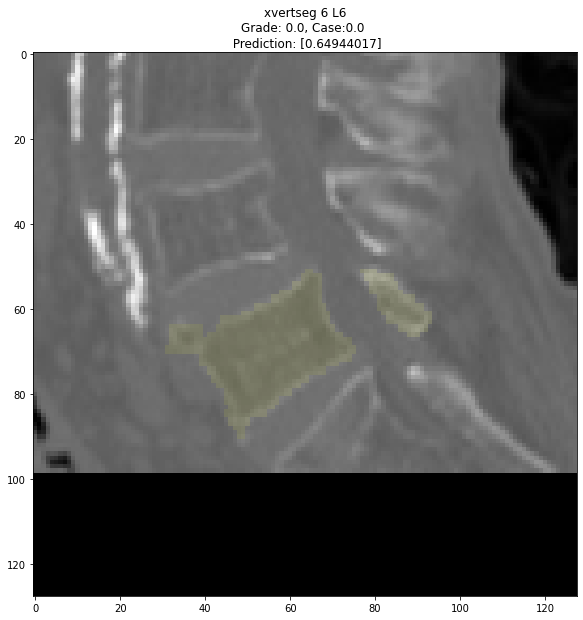

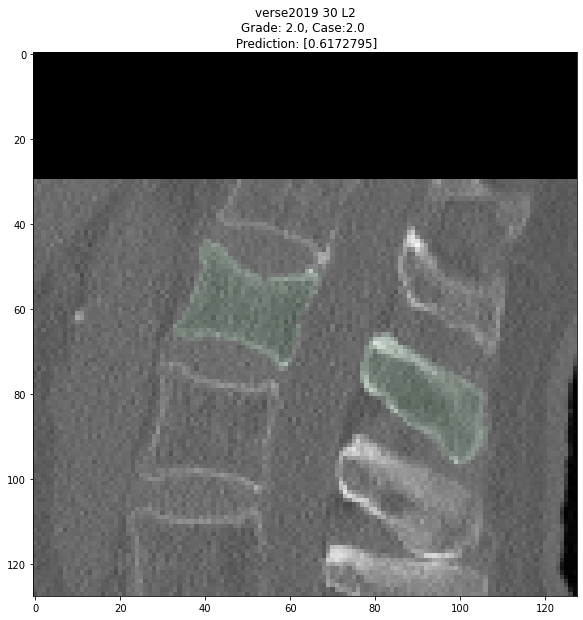

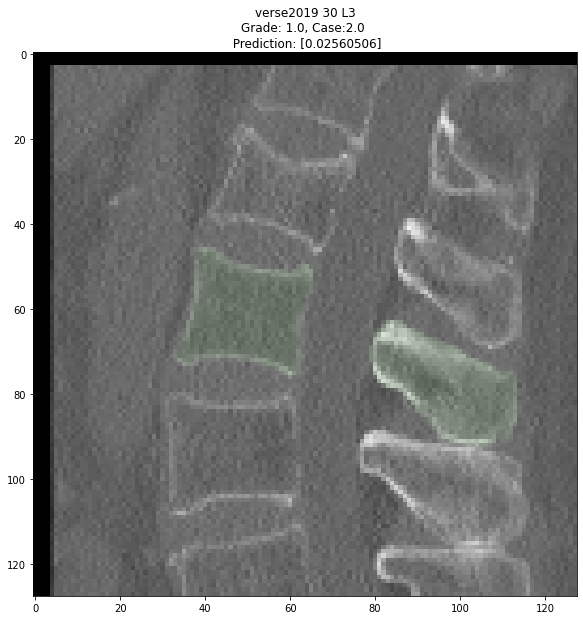

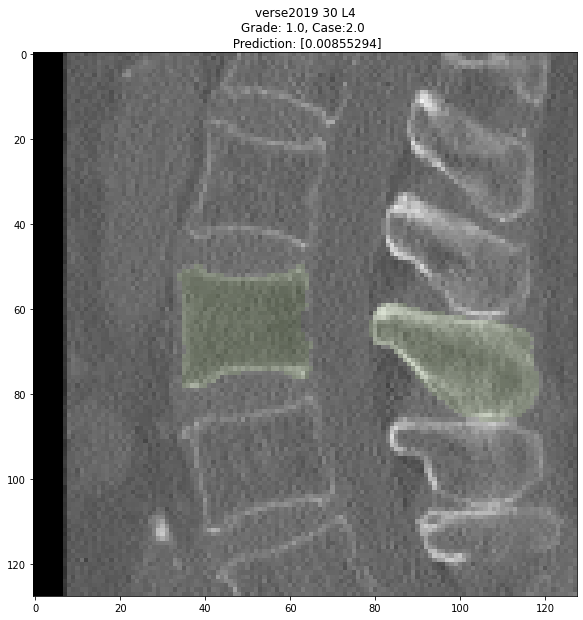

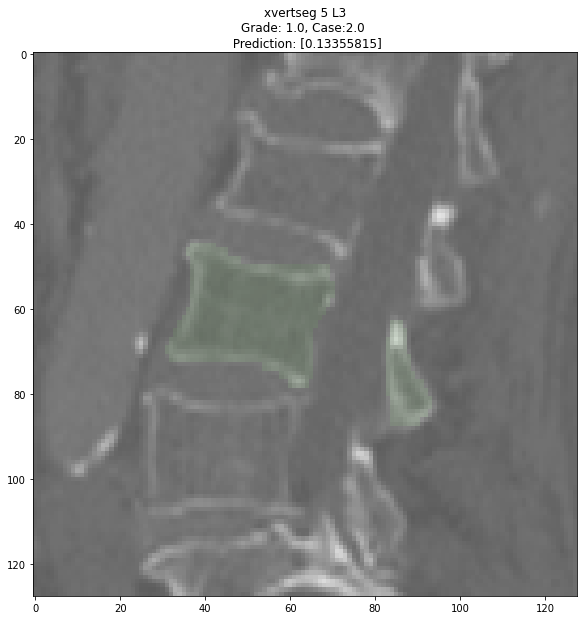

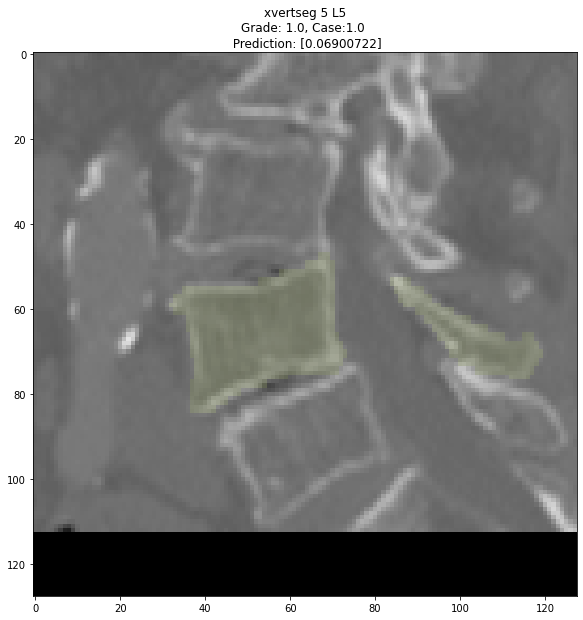

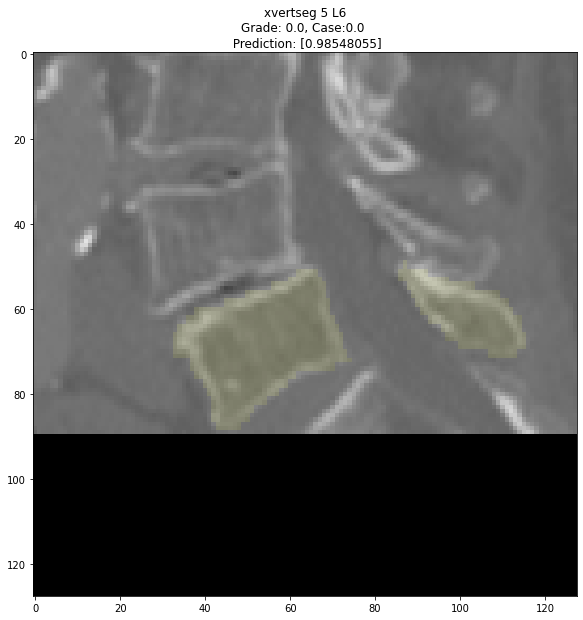

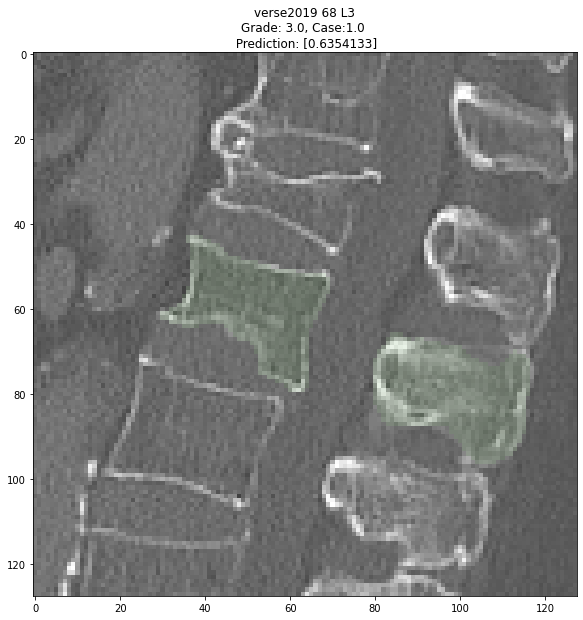

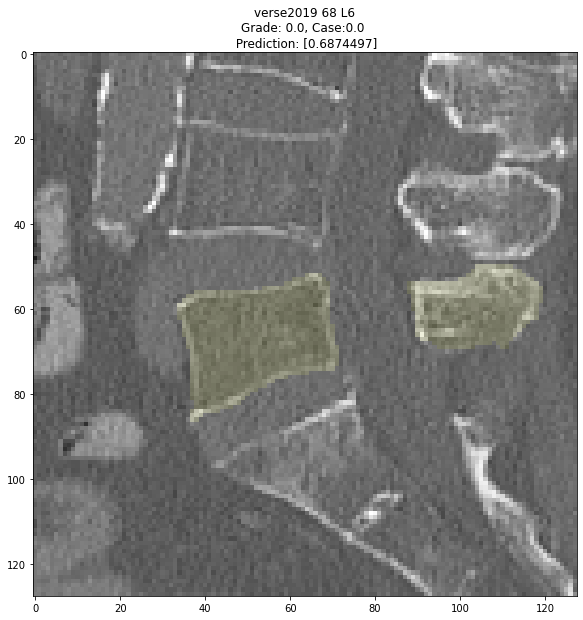

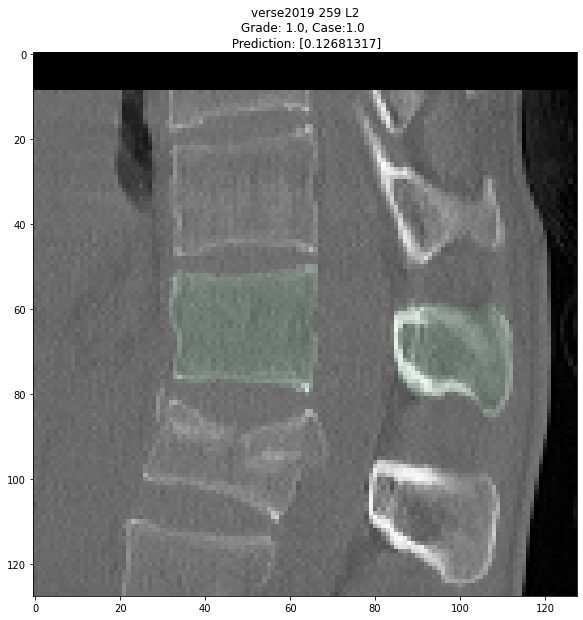

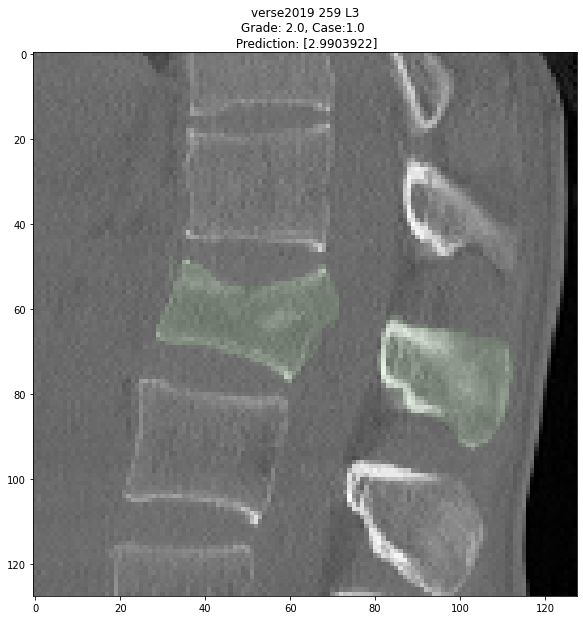

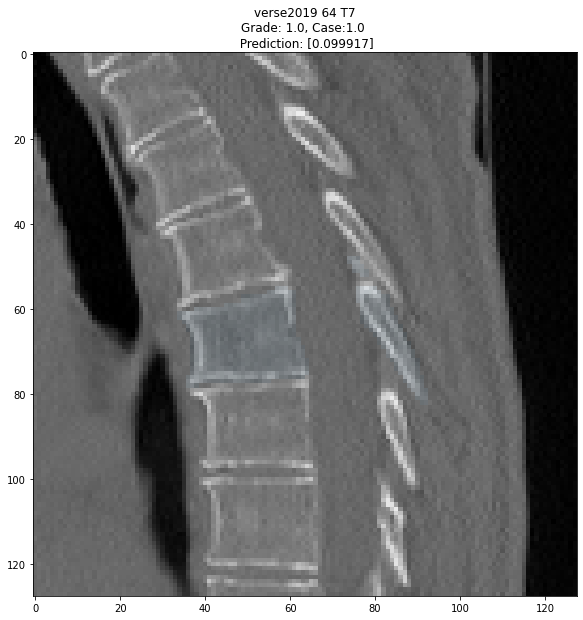

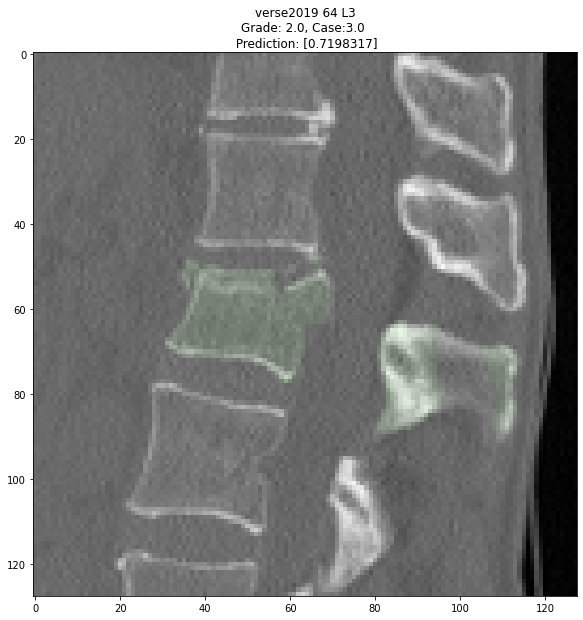

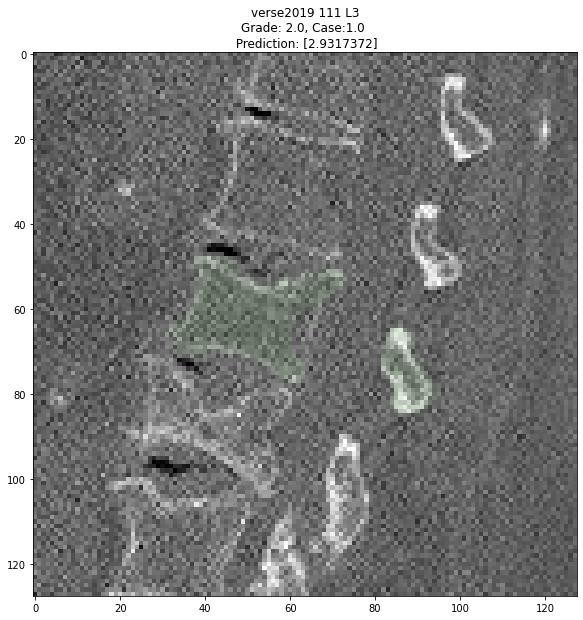

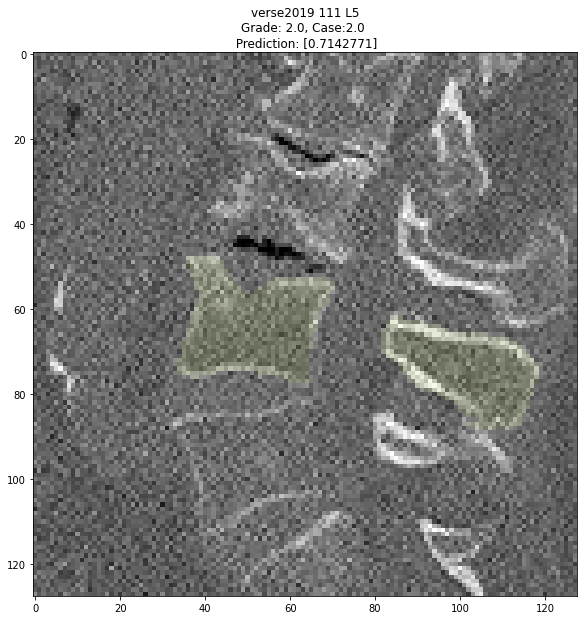

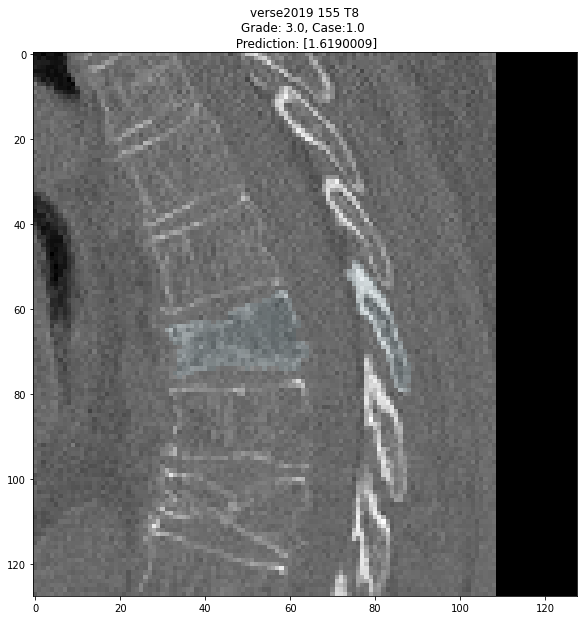

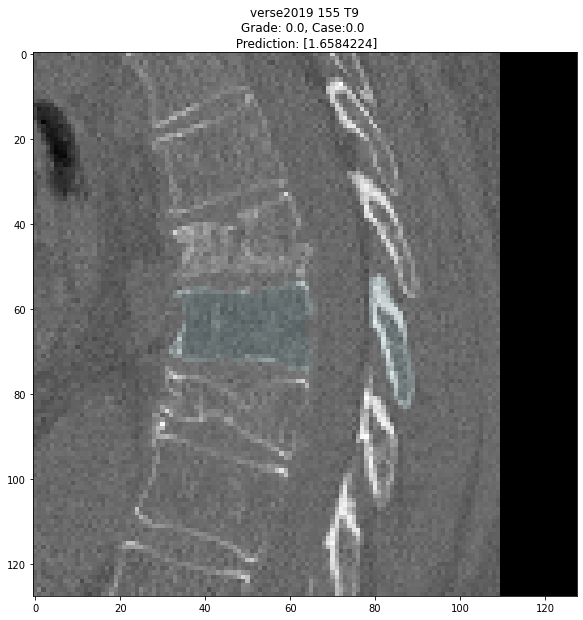

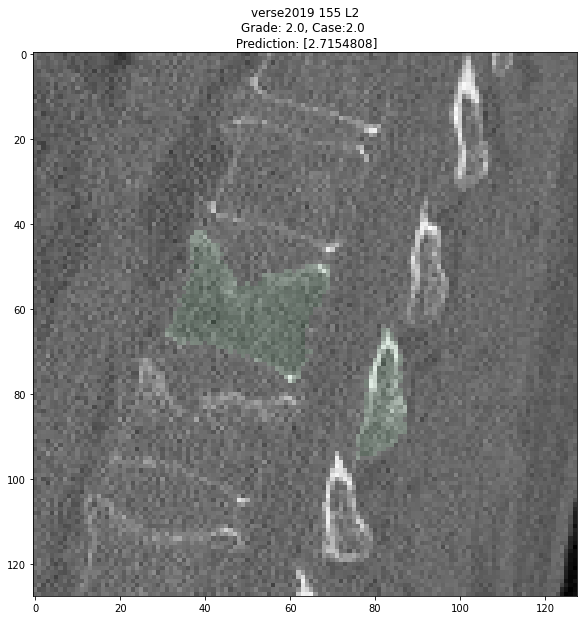

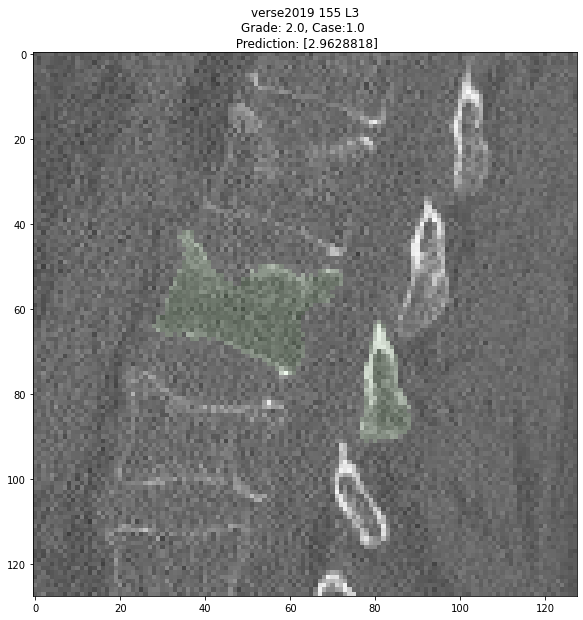

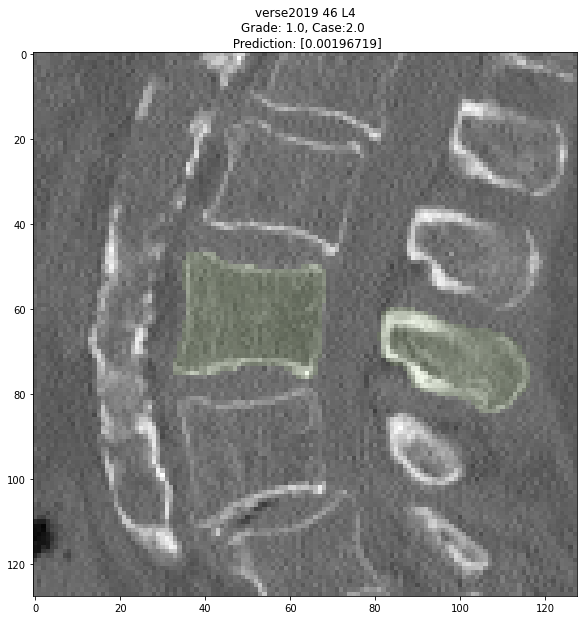

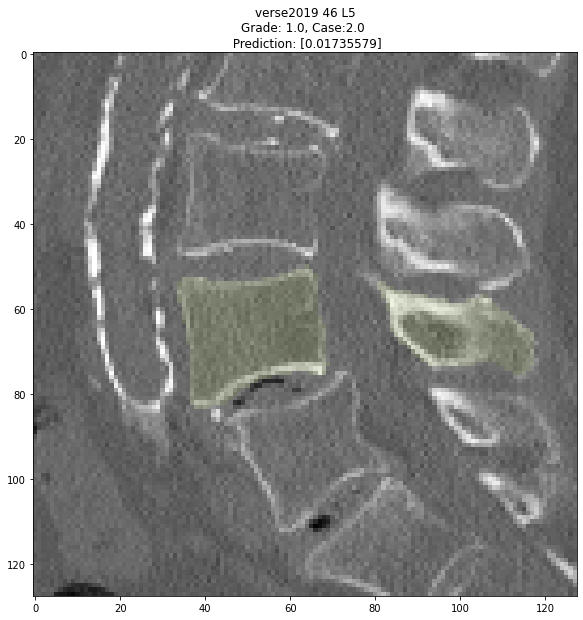

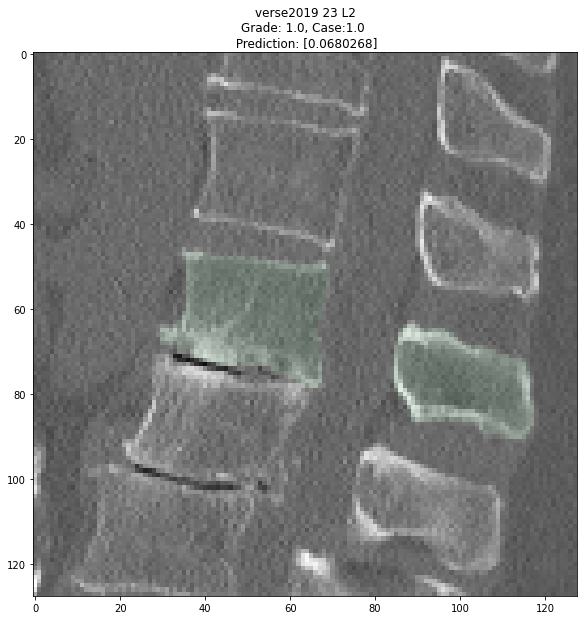

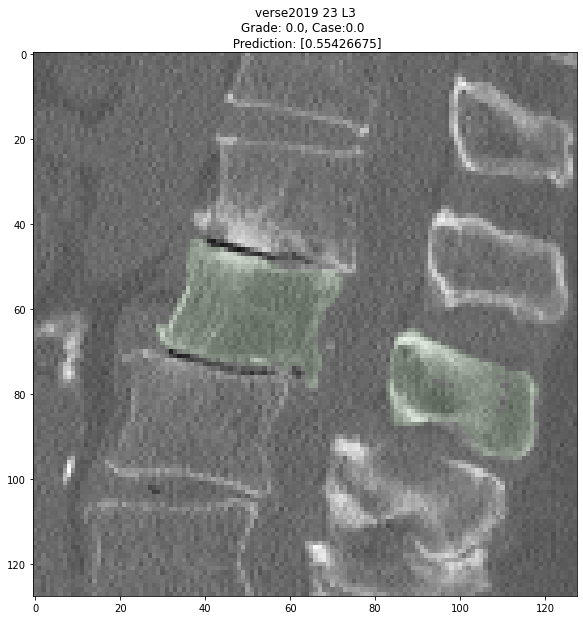

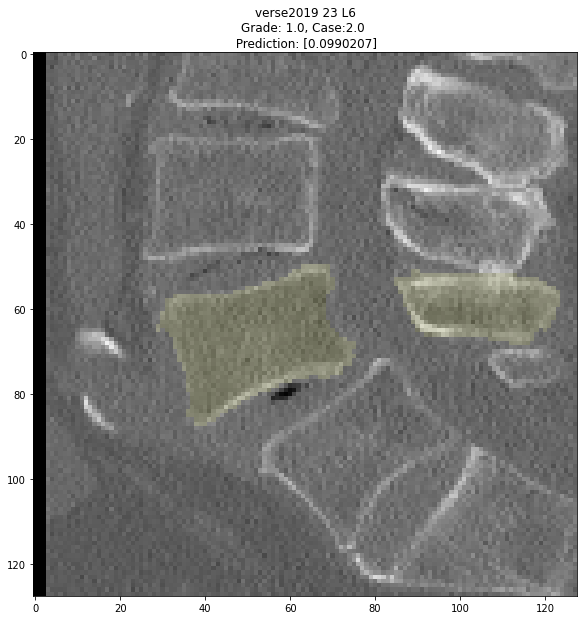

26


In [64]:
errors = 0

for i in range(118): 
    img = test_set.img_patches[i]
    msk = test_set.msk_patches[i]
    grade = test_set.grades[i]
    case = test_set.cases[i]
    pred = soft_preds[i]
    hard_pred = np.round(pred * 3)
    ID = test_set.IDS[i]
    dataset = test_set.sources[i]
    vert = test_set.vertebrae[i]
    vert_names = np.asarray(['T{}'.format(i) for i in range(1, 13)] + ['L{}'.format(i) for i in range(1, 7)])
    
    if grade != hard_pred:  
        errors += 1
        plt.figure(figsize=(10, 10))
        mid_slice = img.shape[0] // 2 
        msk = np.ma.masked_where(msk == 0, msk)
        plt.imshow(img[mid_slice, :, :], cmap='gray', vmin=0, vmax=1)
        plt.imshow(msk[mid_slice, :, :], alpha=0.1, vmin=0, vmax=1)
        plt.title('{} {} {}\nGrade: {}, Case:{} \n Prediction: {}'.format(dataset, ID, vert_names[vert], grade, case, pred * 3))
        plt.show()

print(errors)